# Medical Cost Personal Insurance Project

### Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi, no of dependents ,smoker ,region  medical insurance is calculated.

### Variables

•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

### Objective

Predict insurance costs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Insurance Dataset

data=pd.read_csv(r"C:\Users\JPGD\Documents\ANDREA GOMEZ\FLIP ROBO TECHNOLOGIES INTERNSHIP\Projects\Datasets\medical_cost_insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
# Checking the dimension of the dataset

data.shape

(1338, 7)

In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


This dataset contains 1338 rows and 7 columns, out of which 1 is target variable ("charges") and the remaining 6 are independent variables.

In [6]:
# Checking the types of columns (non-graphical analysis)
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are 3 different types of data present in the dataset (int64,object,float64).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# checking the null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values present in the dataset.

<AxesSubplot:>

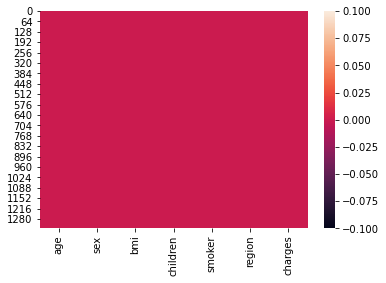

In [9]:
# Heatmap to visually check for null values

sns.heatmap(data.isnull())

The graph shows that there are no null values present in the dataset.

In [10]:
# Check duplicates in DataFrame

print("Total Duplicate Rows are:",data.duplicated().sum())

Total Duplicate Rows are: 1


In [11]:
# Select duplicate rows based on all columns
duplicate=data[data.duplicated(keep=False)]
duplicate

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
# Remove duplicate rows

data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
# Separating Numerical and Categorical columns
# Checking for Categorical Columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("/n")

#Checking for Numerical Columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)
print("/n")

Categorical Columns:  ['sex', 'smoker', 'region']
/n
Numerical Columns:  ['age', 'bmi', 'children', 'charges']
/n


In [14]:
# Checking the value counts of each column

for i in data.columns:
    print(data[i].value_counts())
    print("\n")

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
11987.16820    1
7624.63000     1
12523.60480    1
10355.64100 

In [15]:
# Checking number of unique values in each column
data.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


## Description of DataSet

In [16]:
# Statistical summary

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the data description we can observe the following:
There are no missing values since the count of all columns after removing duplicates is the same 1338.
The median (50%) is lower than the mean in all columns, which means that the dataset is skewed to the right.
There is a big difference between 3rd quartile (75%) and max value in charges columns, which indicates that outliers are present in the dataset.
There is also a moderate difference between first quartile (25%) and minimum value in all columns, except for children column, where outliers could be present.

## Data Visualization

In [17]:
# data.columns

<AxesSubplot:>

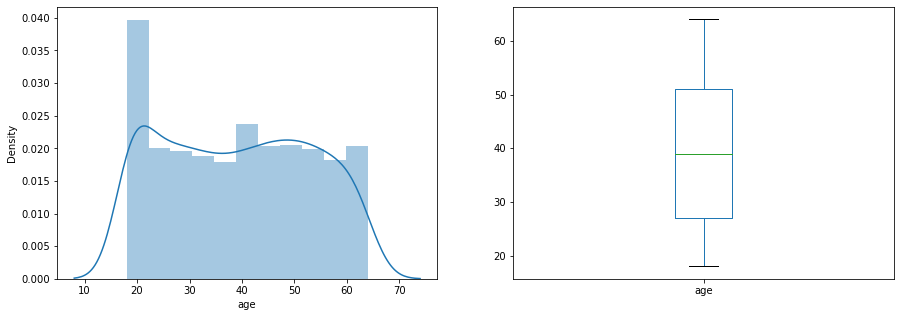

In [18]:
### Checking Data Distribution and outliers per numerical feature

plt.figure(2)
plt.subplot(121)
sns.distplot(data['age'])
plt.subplot(122)
data['age'].plot.box(figsize=(15,5))

<AxesSubplot:>

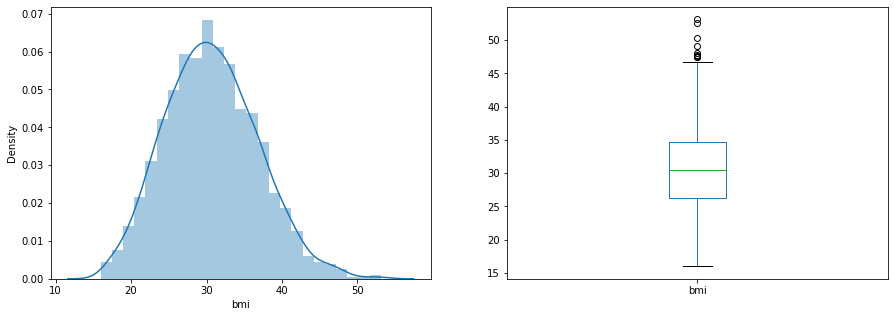

In [19]:
### Checking Data Distribution and outliers per numerical feature

plt.figure(2)
plt.subplot(121)
sns.distplot(data['bmi'])
plt.subplot(122)
data['bmi'].plot.box(figsize=(15,5))

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


<AxesSubplot:xlabel='children', ylabel='count'>

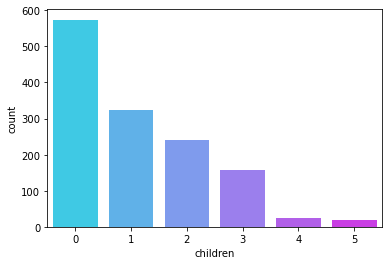

In [20]:
### Checking the number of children

print(data["children"].value_counts())
sns.countplot(x=data["children"],palette="cool")

<AxesSubplot:>

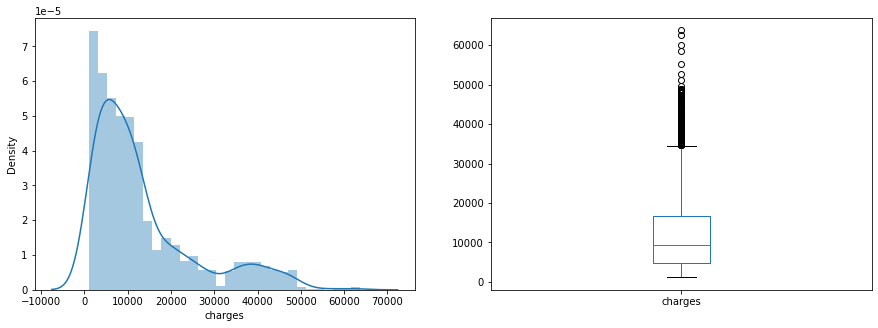

In [21]:
### Checking Data Distribution and outliers per numerical feature

plt.figure(2)
plt.subplot(121)
sns.distplot(data['charges'])
plt.subplot(122)
data['charges'].plot.box(figsize=(15,5))

male      676
female    662
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

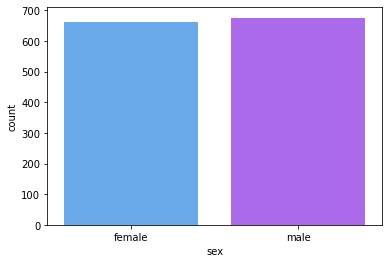

In [22]:
### Checking the number of males and females
print(data["sex"].value_counts())
sns.countplot(x=data["sex"],palette="cool")

no     1064
yes     274
Name: smoker, dtype: int64


<AxesSubplot:xlabel='smoker', ylabel='count'>

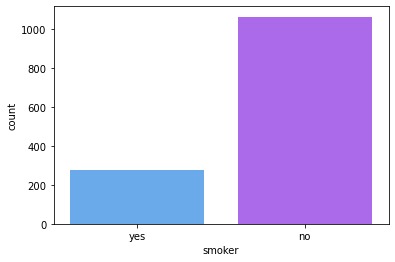

In [23]:
### Checking the number of smokers
print(data["smoker"].value_counts())
sns.countplot(x=data["smoker"],palette="cool")

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

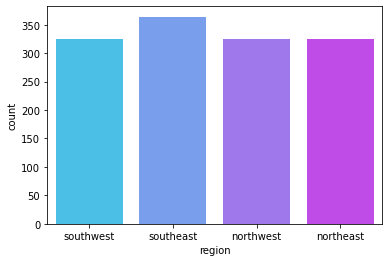

In [24]:
### Checking the number of regions
print(data["region"].value_counts())
sns.countplot(x=data["region"],palette="cool")

As per graphs, we can see that most of the population in this dataset is young and almost equally distributed between males and females in their 20's. The majority of people in the dataset do not have children or at least not covered by health insurance. In addition, most of them are non smokers, with a little more presence in the southeast region. 

With regards to charges billed by health insurance, there are outliers present, showing that these charges can rise up to 70.000.

An important consideration for BMI, which normal range should be 18.5 to 24.9, shows a population that is overweight.

## Data Preprocessing

##### Remove Outliers

In [25]:
from scipy.stats import zscore

out_features=data[["bmi","charges"]]
z=np.abs(zscore(out_features))
z
#z=pd.DataFrame(z)
#df
#z

array([[0.45332   , 0.2985838 ],
       [0.5096211 , 0.95368917],
       [0.38330685, 0.72867467],
       ...,
       [1.0148781 , 0.96159623],
       [0.79781341, 0.93036151],
       [0.26138796, 1.31105347]])

In [26]:
# Threshold=3
np.where(z>3)

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
       dtype=int64),
 array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64))

In [27]:
data1=data[(z<3).all(axis=1)]
data1.shape

(1327, 7)

In [28]:
# Shape of Old and New DataFrame
print("Old DataFrame - ",data.shape[0])
print("New DataFrame - ",data1.shape[0])

Old DataFrame -  1338
New DataFrame -  1327


In [29]:
print("Data Loss Percentage - ",((data.shape[0]-data1.shape[0])/data.shape[0]*100))

Data Loss Percentage -  0.8221225710014948


In [30]:
import operator

# 1st quantile
Q1=out_features.quantile(0.25)


# 3rd quantile
Q3=out_features.quantile(0.75)

# IQR
IQR=Q3-Q1
data2=data[operator.invert(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1))]

In [31]:
data2.shape

(1193, 7)

In [32]:
print("Data Loss Percentage after removing outliers with IQR method - ",((data.shape[0]-data2.shape[0])/data.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method -  10.837070254110612


I will choose the z-score method to remove outliers, since the %loss is lower than the IQR Method.

#### Checking for skewness

In [33]:
data1.skew()

age         0.055031
bmi         0.203726
children    0.933380
charges     1.453405
dtype: float64

After checking for skewness, it is easy to identify 1 variable with skewness > 1 (extremely skewed). Thus, I will remove the skewness using cuberoot method.

In [34]:
# Removing skewness using cuberoot method
data1['charges']=np.cbrt(data1['charges'])

In [35]:
# Checking skewness again
data1.skew()

age         0.055031
bmi         0.203726
children    0.933380
charges     0.490528
dtype: float64

The skewness has been reduced in 'charges' column.

<AxesSubplot:>

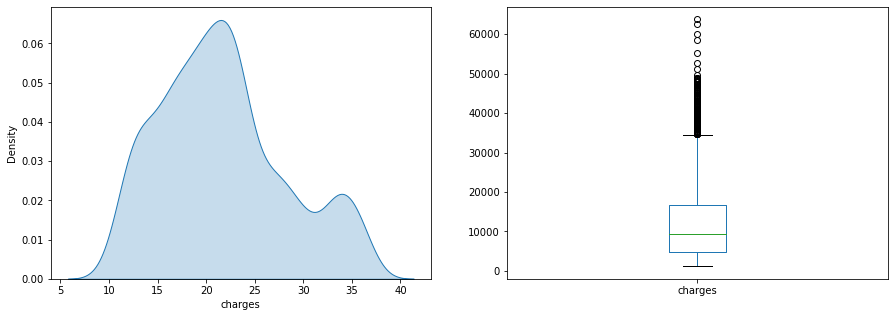

In [36]:
# Visualizing 'charges' distribution after removing outliers.

plt.figure(2)
plt.subplot(121)
sns.distplot(data1['charges'],kde_kws={"shade":True},hist=False)
plt.subplot(122)
data['charges'].plot.box(figsize=(15,5))

Now we can see that the data is almost normally distributed and the skewness values is in my acceptable range.

### Encoding categorical columns

In [37]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

for i in data1.columns:
    if data1[i].dtypes=='object':
        data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))
data1

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,25.654666
1,18,1.0,33.770,1,0.0,2.0,11.994331
2,28,1.0,33.000,3,0.0,2.0,16.447599
3,33,1.0,22.705,0,0.0,1.0,28.013799
4,32,1.0,28.880,0,0.0,1.0,15.695891
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,21.967271
1334,18,0.0,31.920,0,0.0,0.0,13.017690
1335,18,0.0,36.850,0,0.0,2.0,11.768318
1336,21,0.0,25.800,0,0.0,3.0,12.615872


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1327 non-null   int64  
 1   sex       1327 non-null   float64
 2   bmi       1327 non-null   float64
 3   children  1327 non-null   int64  
 4   smoker    1327 non-null   float64
 5   region    1327 non-null   float64
 6   charges   1327 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 82.9 KB


In [39]:
# Checking statistics after encoding categorical data

data1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000
mean,39.212509,0.503391,30.570757,1.098719,0.200452,1.513188,21.655110
std,14.042708,0.500177,5.990504,1.207089,0.400490,1.106514,6.498999
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,10.390777
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,16.785064
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,21.030864
75%,51.000000,1.000000,34.540000,2.000000,0.000000,2.000000,25.385540
max,64.000000,1.000000,48.070000,5.000000,1.000000,3.000000,36.736295


### Correlation between the target variable and independent variables

In [40]:
correlation=data1.corr()
correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020610,0.117993,0.043074,-0.027158,0.001373,0.457594
sex,-0.020610,1.000000,0.039539,0.017557,0.075665,0.000260,0.027209
bmi,0.117993,0.039539,1.000000,0.020254,-0.007974,0.156466,0.151532
children,0.043074,0.017557,0.020254,1.000000,0.010516,0.019069,0.130194
smoker,-0.027158,0.075665,-0.007974,0.010516,1.000000,-0.004268,0.725528
region,0.001373,0.000260,0.156466,0.019069,-0.004268,1.000000,-0.032431
charges,0.457594,0.027209,0.151532,0.130194,0.725528,-0.032431,1.000000


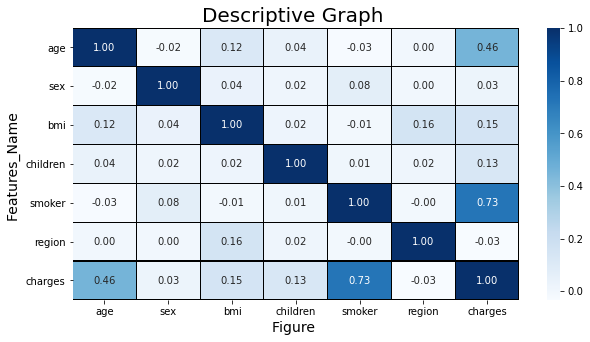

In [41]:
# Visualizing the correlation matrix by plotting a heatmap

plt.figure(figsize=(10,5))
sns.heatmap(data1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('Figure ',fontsize=14)
plt.ylabel('Features_Name ',fontsize=14)
plt.title('Descriptive Graph ',fontsize=20)
plt.show()

In [42]:
data1.corr()['charges'].sort_values()

region     -0.032431
sex         0.027209
children    0.130194
bmi         0.151532
age         0.457594
smoker      0.725528
charges     1.000000
Name: charges, dtype: float64

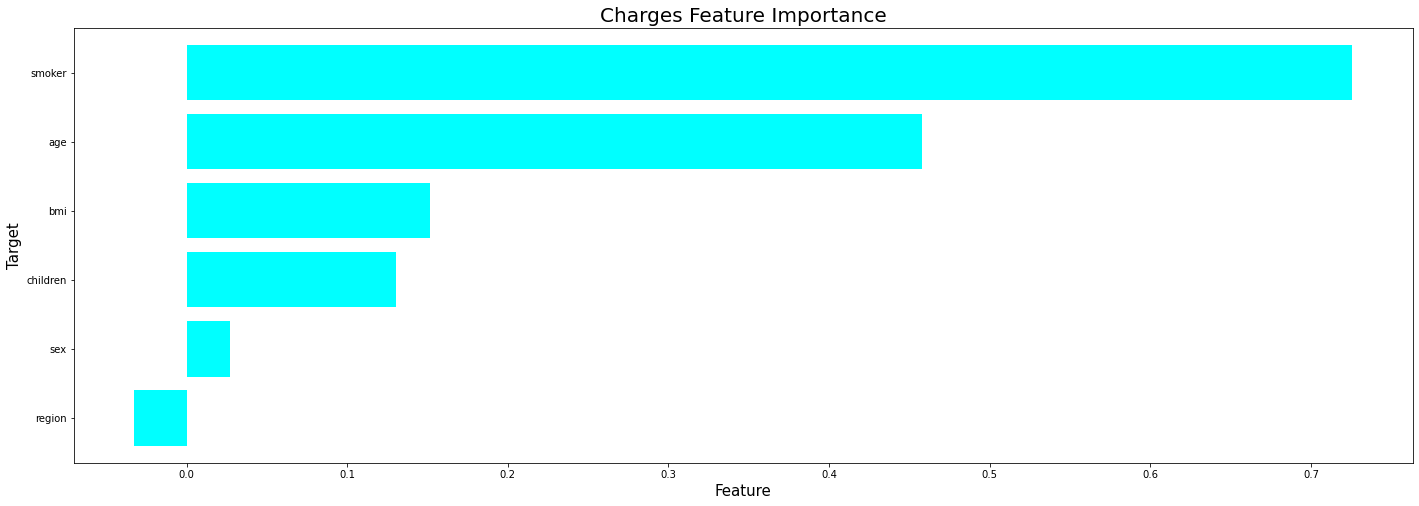

In [43]:
# Visualize correlations of charges by feature importance

plt.figure(figsize=(24,8))
data1.corr()['charges'].sort_values().drop(['charges']).plot(kind='barh',color='aqua',width=0.8)
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Charges Feature Importance',fontsize=20)
plt.show()

The graph shows the top features which are correlated to charges. The main one is if a person is a smoker. While, 'sex' and 'region' are less correlated to charges.

#### Separating features and label

In [44]:
# Separating the independent and target variables into x and y

x=data1.drop("charges",axis=1)
y=data1["charges"]

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (1327, 6)
Label Dimension (1327,)


#### Feature Scaling using Standard Scalarization

In [45]:
 from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.439902,-1.006805,-0.446000,-0.910565,1.997178,1.344197
1,-1.511141,0.993241,0.534254,-0.081813,-0.500706,0.440117
2,-0.798759,0.993241,0.405668,1.575689,-0.500706,0.440117
3,-0.442568,0.993241,-1.313533,-0.910565,-0.500706,-0.463963
4,-0.513806,0.993241,-0.282346,-0.910565,-0.500706,-0.463963
...,...,...,...,...,...,...
1322,0.768481,0.993241,0.066671,1.575689,-0.500706,-0.463963
1323,-1.511141,-1.006805,0.225315,-0.910565,-0.500706,-1.368042
1324,-1.511141,-1.006805,1.048595,-0.910565,-0.500706,0.440117
1325,-1.297426,-1.006805,-0.796687,-0.910565,-0.500706,1.344197


#### Checking Variance Inflation Factor (VIF)

In [46]:
# Finding VIF in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF Values,Features
0,1.017498,age
1,1.008283,sex
2,1.041989,bmi
3,1.002811,children
4,1.006607,smoker
5,1.025755,region


The VIF values show that there is no multicollinearity among the independent variables.

## Modelling

### Finding the best random state

In [47]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

#### Creating train test split

In [48]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximun r2 score is ",maxAccu, "on random_state",maxRS)

Maximun r2 score is  0.8378835671348739 on random_state 75


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR

In [51]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 Score:',r2_score(y_test,pred_LR))
print('R2 Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 Score: 0.8378835671348739
R2 Score on training data: 74.99995443717123
Mean Absolute Error: 1.8071514906125918
Mean Squared Error: 6.788752358216624
Root Mean Squared Error: 2.6055234326746373


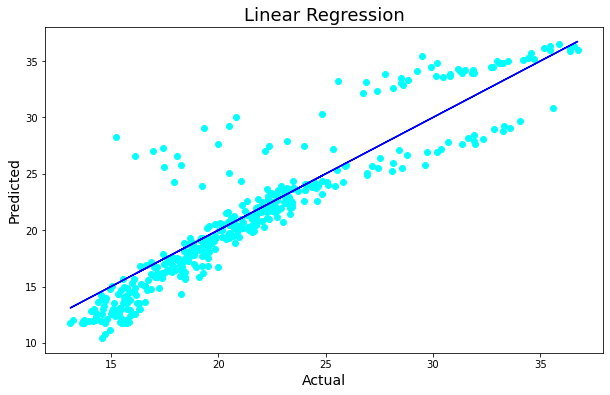

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='aqua')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [53]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 Score:',r2_score(y_test,pred_RFR))
print('R2 Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 Score: 0.8528509062829034
R2 Score on training data: 96.79834430324236
Mean Absolute Error: 1.4764012434904292
Mean Squared Error: 6.1619833309092655
Root Mean Squared Error: 2.4823342504403523


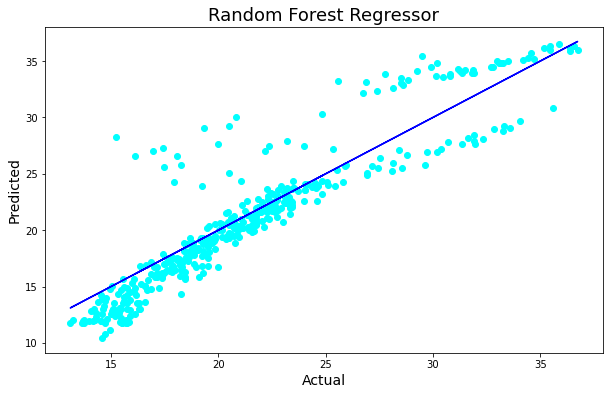

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='aqua')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Random Forest Regressor",fontsize=18)
plt.show()

In [54]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2 Score:',r2_score(y_test,pred_knn))
print('R2 Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 0.8414853887896666
R2 Score on training data: 83.76899946669991
Mean Absolute Error: 1.7357030031338836
Mean Squared Error: 6.637923260754352
Root Mean Squared Error: 2.5764167482677083


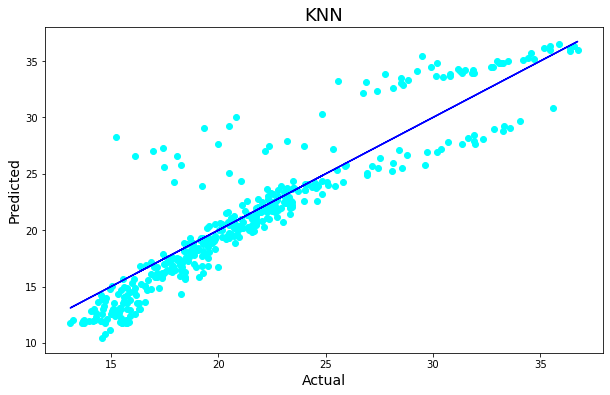

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='aqua')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("KNN",fontsize=18)
plt.show()

In [55]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 Score:',r2_score(y_test,pred_GBR))
print('R2 Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: 0.8920245881408346
R2 Score on training data: 86.36016820479217
Mean Absolute Error: 1.3264293378000784
Mean Squared Error: 4.521554779694415
Root Mean Squared Error: 2.1263947845342397


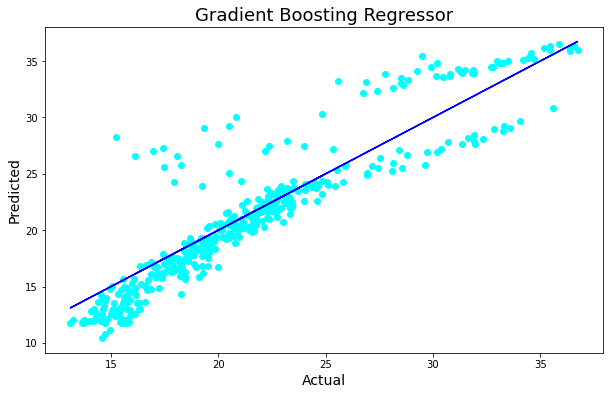

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='aqua')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Gradient Boosting Regressor",fontsize=18)
plt.show()

In [56]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2 Score:',r2_score(y_test,pred_lasso))
print('R2 Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score: 0.7338237648787371
R2 Score on training data: 68.0694373236913
Mean Absolute Error: 2.5252438009086293
Mean Squared Error: 11.146337924817562
Root Mean Squared Error: 3.338613173881868


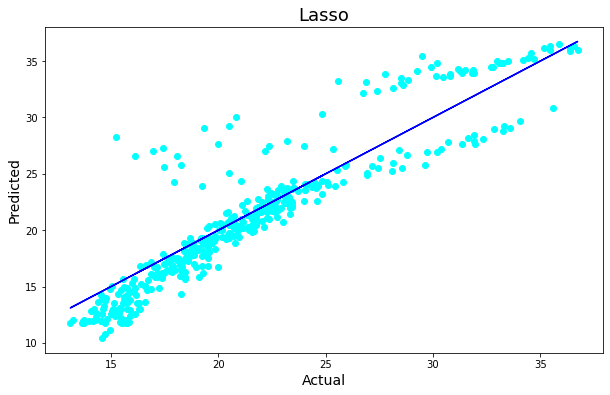

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='aqua')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Lasso",fontsize=18)
plt.show()

In [57]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_ridge=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2 Score:',r2_score(y_test,pred_ridge))
print('R2 Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ridge))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score: 0.8377500308956811
R2 Score on training data: 74.99986792847425
Mean Absolute Error: 1.8091383133539372
Mean Squared Error: 6.794344292622688
Root Mean Squared Error: 2.606596304114369


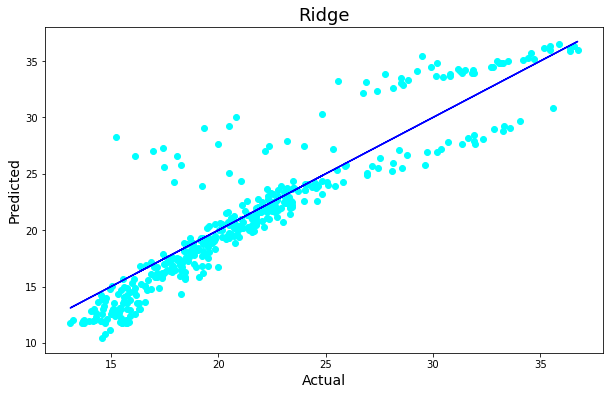

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='aqua')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Ridge",fontsize=18)
plt.show()

In [58]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2 Score:',r2_score(y_test,pred_DTR))
print('R2 Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 Score: 0.6493858498352316
R2 Score on training data: 100.0
Mean Absolute Error: 1.7948867133484707
Mean Squared Error: 14.682241625285693
Root Mean Squared Error: 3.831741330685788


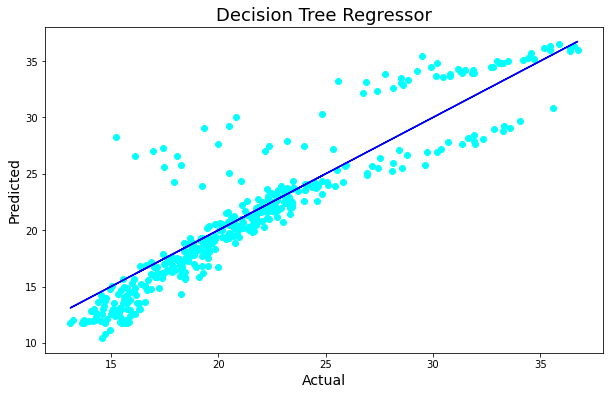

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='aqua')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Decision Tree Regressor",fontsize=18)
plt.show()

In [59]:
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 Score:',r2_score(y_test,pred_SVR))
print('R2 Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2 Score: 0.8854445540573231
R2 Score on training data: 78.65332779967954
Mean Absolute Error: 0.9313027905406074
Mean Squared Error: 4.79709885078034
Root Mean Squared Error: 2.1902280362510975


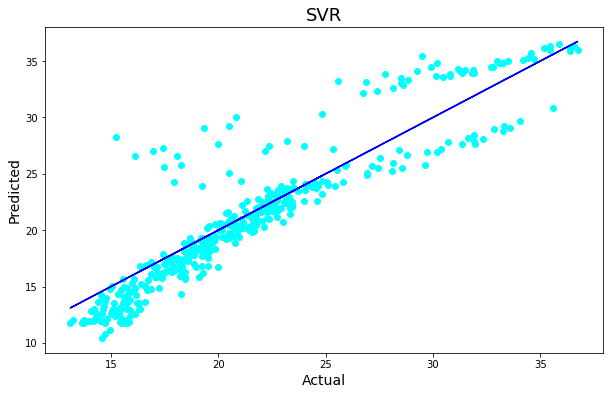

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='aqua')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("SVR",fontsize=18)
plt.show()

In [60]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 Score:',r2_score(y_test,pred_ETR))
print('R2 Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2 Score: 0.8317003411592991
R2 Score on training data: 100.0
Mean Absolute Error: 1.355810701231566
Mean Squared Error: 7.0476797795841515
Root Mean Squared Error: 2.6547466507341433


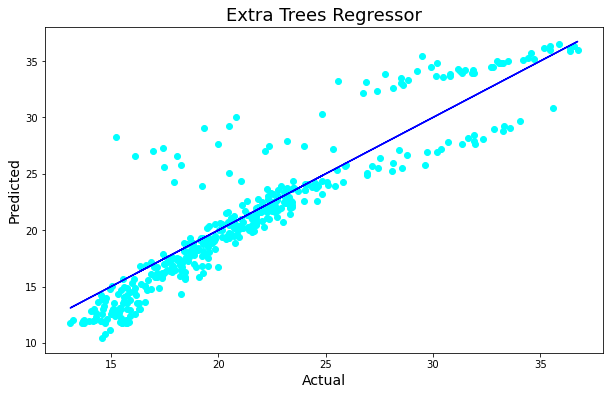

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='aqua')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Extra Trees Regressor",fontsize=18)
plt.show()

### Cross Validation Score

In [61]:
from sklearn.model_selection import cross_val_score

In [73]:
# Checking cv score
score=cross_val_score(LR,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.80862291 0.70720627 0.83000087 0.76991128 0.75689263]
0.7745267926490887
Difference between R2 Score and Cross Validation Score is 6.3356774485785134


In [74]:
# Checking CV Score
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.83788892 0.71375347 0.84850474 0.81769193 0.80404839]
0.8043774894833167
Difference between R2 Score and Cross Validation Score is 4.847341679958673


In [75]:
# Checking CV Score
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.83877161 0.70736416 0.83032421 0.79527829 0.79201812]
0.7927512793257401
Difference between R2 Score and Cross Validation Score is 4.873410946392653


In [76]:
# Checking CV Score
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.86653935 0.74449272 0.89368483 0.83021168 0.81765487]
0.8305166911752797
Difference between R2 Score and Cross Validation Score is 6.150789696555492


In [77]:
# Checking CV Score
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_lasso)-score4.mean())*100)

[0.73165544 0.66122026 0.72476515 0.70298669 0.69575232]
0.7032759718946521
Difference between R2 Score and Cross Validation Score is 3.0547792984085054


In [78]:
# Checking CV Score
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_ridge)-score5.mean())*100)

[0.80857832 0.70731953 0.82987612 0.76995601 0.75691514]
0.7745290250149982
Difference between R2 Score and Cross Validation Score is 6.322100588068292


In [79]:
# Checking CV Score
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_DTR)-score6.mean())*100)

[0.73234954 0.61230198 0.62167862 0.68260258 0.55389086]
0.6405647152284574
Difference between R2 Score and Cross Validation Score is 0.882113460677425


In [80]:
# Checking CV Score
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_SVR)-score7.mean())*100)

[0.86639263 0.71953315 0.88136762 0.80082427 0.79238129]
0.8120997927476189
Difference between R2 Score and Cross Validation Score is 7.334476130970424


In [81]:
# Checking CV Score
score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_ETR)-score8.mean())*100)

[0.80371194 0.68465465 0.82745043 0.78712275 0.78689655]
0.7779672636684601
Difference between R2 Score and Cross Validation Score is 5.373307749083899


DecisionTreeRegressor is the best fitting and performing model given the difference between the R2 Score and Cross Validation Score.

### Hyperparameter Tuning

In [96]:
# DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

# Always take at least 5 parameters
parameters={'criterion':['mse','squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'max_depth':[10,12,25,50,100],
            'min_samples_split':[2,5,10,15],
            'min_impurity_decrease':[0,0.0005,0.001,0.005,0.01]
      }

In [97]:
DecisionTreeRegressor().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [98]:
gscv=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)

In [99]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [10, 12, 25, 50, 100],
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01],
                         'min_samples_split': [2, 5, 10, 15]})

In [100]:
gscv.best_params_

{'criterion': 'poisson',
 'max_depth': 25,
 'min_impurity_decrease': 0,
 'min_samples_split': 15}

In [101]:
Model=DecisionTreeRegressor(criterion='poisson',max_depth=25,min_samples_split=15,min_impurity_decrease=0)

In [102]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2 Score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 0.8522315475412792
Mean Absolute Error: 1.602933137767989
Mean Squared Error: 6.187919462388803
Root Mean Squared Error: 2.487552906450193


### Saving the model

In [103]:
import pickle
filename="Insurance.pkl"
pickle.dump(Model,open(filename,'wb'))

### Predicting based on saved model

In [104]:
# Loading the saved model and getting the predictions

import pickle
loaded_model=pickle.load(open("Insurance.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result*100)

85.22315475412792


In [105]:
# Checking if the model is giving the consistent predictions

comp=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
comp

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
Predicted,17.587394,14.438912,17.521698,24.648557,17.428923,22.819861,17.428923,24.86842,33.317798,23.44216,...,21.831949,17.428923,24.091592,21.237391,23.442160,33.758857,34.670675,24.467392,23.359249,25.312579
Original,26.608292,13.040507,16.715735,22.432959,16.811139,23.524894,16.389197,23.19268,32.608206,33.19574,...,20.350544,24.305338,21.228784,29.084592,23.599766,36.166234,33.362366,21.182321,22.475349,24.370790


After Hyperameter Tuning, there is an evident increase in the accuracy of the model. Furthermore, the results show that in general terms the model is giving good predictions.